# Numpy 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
matrix = np.random.randint(1, 17, (4, 4))
matrix

array([[ 7,  4, 13, 15],
       [11,  8, 13,  5],
       [ 7, 10,  3,  7],
       [11, 11,  8,  5]])

In [3]:
print(matrix[0, :]) #first row
print(matrix[:, -1].reshape(-1, 1))
print(matrix[matrix > 10])
print(np.where(matrix > 10, 1, 0))

[ 7  4 13 15]
[[15]
 [ 5]
 [ 7]
 [ 5]]
[13 15 11 13 11 11]
[[0 0 1 1]
 [1 0 1 0]
 [0 0 0 0]
 [1 1 0 0]]


Portfolio return

In [4]:
np.random.seed(42)
returns = np.random.normal(0, 0.1, 100)
cumulative_sum = np.cumsum(returns)

window = 2
rolling_mean = (cumulative_sum[window:] - cumulative_sum[: -window]) / window
rolling_mean = np.concatenate([np.full(window, 0), rolling_mean])

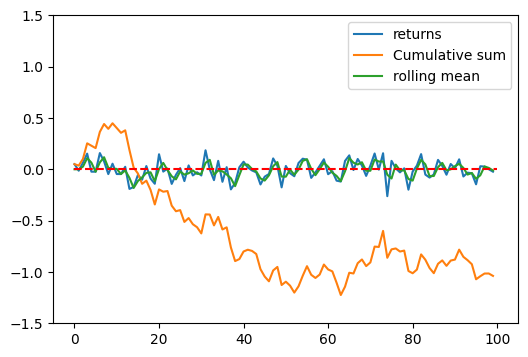

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(returns, label="returns")
plt.plot(cumulative_sum, label="Cumulative sum")
plt.plot(rolling_mean, label="rolling mean")
plt.hlines(y = 0, xmin = 0, xmax = 100, colors="r", linestyle="--")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

### Matrix operations

In [6]:
cov_matrix = np.random.rand(2,2)

print("Eigen values", np.linalg.eigvals(cov_matrix))
print("eigen vectors", np.linalg.eig(cov_matrix).eigenvectors)

print("Principal component", np.linalg.eig(cov_matrix).eigenvectors[0])

Eigen values [0.54548594 0.20954024]
eigen vectors [[ 0.86629393 -0.73011971]
 [ 0.49953461  0.68331925]]
Principal component [ 0.86629393 -0.73011971]


## Boolean indexing


In [7]:
prices = np.array([120, 45, 78, 150, 90, 30, 60])

print(prices[prices > 100])
prices[prices < 50] = 50
prices

[120 150]


array([120,  50,  78, 150,  90,  50,  60])

### Random Data Simulation

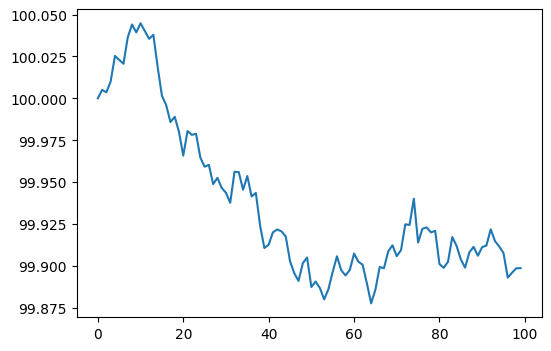

In [8]:
np.random.seed(42)
init_value = 100
steps = 100

mean = 0
std = 0.01

random_size_step = np.random.normal(mean, std, steps - 1)
cum_random_size_step = np.cumsum(random_size_step)

serie = np.zeros(steps)
serie[0] = init_value
serie[1:] = init_value + cum_random_size_step

plt.figure(figsize=(6,4))
plt.plot(serie)
plt.show()

### Sharpe Ratio Calculation

Get the annualized Sharpe ratio assuming 252 trading days per year

In [9]:
returns = np.array([0.001, 0.002, -0.0015, 0.0025, -0.001])

mean = np.mean(returns)
std = np.std(returns)

sharpe_ratio = mean / std * np.sqrt(252)
sharpe_ratio

5.976331268685737

### FX Data Manipulation

Problem: Given bid and ask prices for EUR/USD over 10 days:

In [10]:
import pandas as pd

bid_prices = np.array([1.0990, 1.0985, 1.0975, 1.0995, 1.1000, 1.1010, 1.1020, 1.1030, 1.1040, 1.1050])
ask_prices = np.array([1.1010, 1.1005, 1.0995, 1.1015, 1.1020, 1.1030, 1.1040, 1.1050, 1.1060, 1.1070])

mid_price = (bid_prices + ask_prices) / 2

serie = pd.Series(mid_price)
window_mean_serie = serie.rolling(window=3).mean()
print(window_mean_serie)

0         NaN
1         NaN
2    1.099333
3    1.099500
4    1.100000
5    1.101167
6    1.102000
7    1.103000
8    1.104000
9    1.105000
dtype: float64


### Compute the correlation matrix

In [11]:
returns = np.array([
    [0.01, -0.02, 0.03],  # Asset 1
    [-0.01, 0.01, -0.03],  # Asset 2
    [0.02, 0.02, -0.01]    # Asset 3
])


np.corrcoef(returns)

array([[ 1.        , -0.99339927, -0.80295507],
       [-0.99339927,  1.        ,  0.8660254 ],
       [-0.80295507,  0.8660254 ,  1.        ]])

# Pandas

In [12]:
import yfinance as yf

In [13]:
ticker_symbol = "^SPX"
sp500 = yf.download(ticker_symbol, start="2018-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [14]:
sp500.columns = sp500.columns.droplevel(1)
sp500.head(1)

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,2695.810059,2695.889893,2682.360107,2683.72998,3397430000


In [15]:
sp500.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
sp500[['Close', 'High', 'Low', 'Open']].fillna(method= 'ffill', inplace=True)

C:\Users\Marti\AppData\Local\Temp\ipykernel_4644\3083521955.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500[['Close', 'High', 'Low', 'Open']].fillna(method= 'ffill', inplace=True)
C:\Users\Marti\AppData\Local\Temp\ipykernel_4644\3083521955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[['Close', 'High', 'Low', 'Open']].fillna(method= 'ffill', inplace=True)


In [17]:
sp500['Volume'] = sp500['Volume'].replace({np.nan : 0}) #fillna(0, inplace=True)

### Calculate returns

Daily returns for the close price

<Axes: xlabel='Date'>

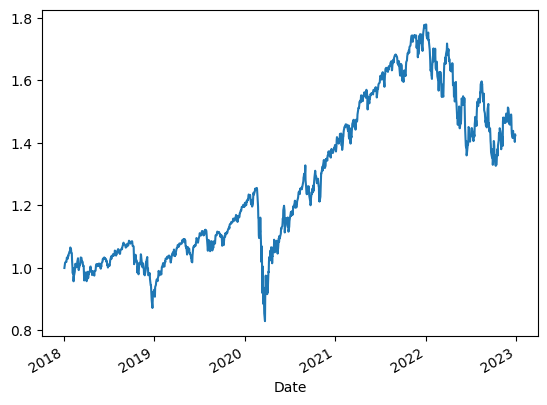

In [18]:
sp500['daily_return'] = sp500['Close'].pct_change()
sp500['cum_return'] = (1 + sp500['daily_return']).cumprod()

sp500['cum_return'] = sp500['cum_return'].fillna(1)

sp500['cum_return'].plot()

### Rolling statistics

<Axes: xlabel='Date'>

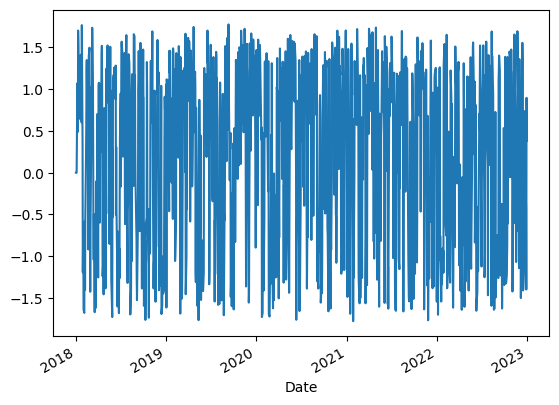

In [19]:
window = 5
sp500['rolling_mean_close'] = sp500['Close'].rolling(window=window).mean()
sp500['rolling_std_close'] = sp500['Close'].rolling(window=window).std()

sp500['Z-score'] = (sp500['Close'] - sp500['rolling_mean_close']) / sp500['rolling_std_close']
sp500['Z-score'] = sp500['Z-score'].fillna(0)
sp500['Z-score'].plot()

### Resample Time-Series Data

- Resample a time-series dataset of daily FX prices to weekly frequency, calculating the mean close price for each week.

- Plot the resampled data

<Axes: xlabel='Date'>

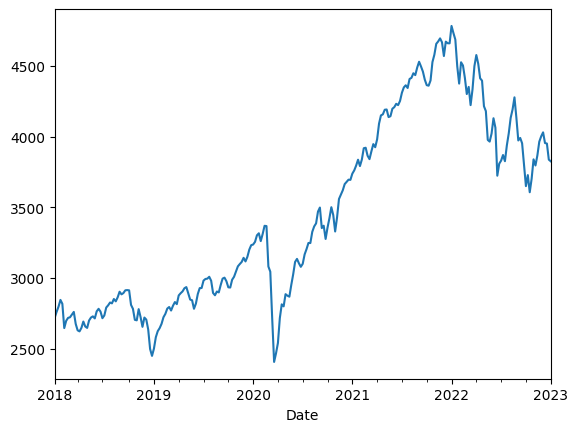

In [20]:
sp500.index = pd.to_datetime(sp500.index)

sp500['Close'].resample('W').mean().plot()

### Identifying outliers

3 standard deviation away

In [21]:
std_volume = sp500['Volume'].std()
median = sp500['Volume'].median()

sp500[ sp500['Volume'] > std_volume * 3 + sp500['Volume'].mean() ] = median
sp500[ sp500['Volume'] < - std_volume * 3 + sp500['Volume'].mean() ] = median

### Merge bid/ask Data

In [22]:
# Example datasets
bid_prices = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', '2023-01-03'], 'bid': [1.099, 1.098, 1.097]})
ask_prices = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', '2023-01-03'], 'ask': [1.101, 1.100, 1.099]})

bid_prices.set_index('date', inplace=True)
ask_prices.set_index('date', inplace=True)

bid_prices.index = pd.to_datetime(bid_prices.index)
ask_prices.index = pd.to_datetime(ask_prices.index)

bid_prices.join(ask_prices)

,bid,ask
date,,
2023-01-01,1.099,1.101
2023-01-02,1.098,1.100
2023-01-03,1.097,1.099


### Analyze portfolio performance

In [23]:
# Example data
portfolio_returns = pd.DataFrame({
    'Asset1': [0.01, -0.02, 0.015],
    'Asset2': [-0.005, 0.01, 0.005],
    'Asset3': [0.02, 0.015, -0.01]
})
weights = np.array([0.4, 0.3, 0.3])  # Portfolio weights

portfolio_returns['weighted_returns']  = portfolio_returns.values @ weights

portfolio_returns['cum_return'] = (1 + portfolio_returns['weighted_returns']).cumprod() - 1
portfolio_returns.head()

,Asset1,Asset2,Asset3,weighted_returns,cum_return
0,0.010,-0.005,0.020,0.0085,0.008500
1,-0.020,0.010,0.015,-0.0005,0.007996
2,0.015,0.005,-0.010,0.0045,0.012532


### Principal component analysis (PCA)

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

returns_data = pd.DataFrame({
    'Asset1': [0.01, -0.02, 0.015],
    'Asset2': [-0.005, 0.01, 0.005],
    'Asset3': [0.02, 0.015, -0.01]
})
standardize_data = (returns_data - returns_data.mean()) / returns_data.std()
print(standardize_data)
pca = PCA(n_components=3)
principal_components = pca.fit(standardize_data)

print("Variance ratio ",principal_components.explained_variance_ratio_)
print(principal_components.components_)

     Asset1    Asset2    Asset3
0  0.440225 -1.091089  0.725866
1 -1.144586  0.872872  0.414781
2  0.704361  0.218218 -1.140647
Variance ratio  [5.61753165e-01 4.38246835e-01 4.56672692e-33]
[[ 0.75334136 -0.61975242 -0.21996303]
 [-0.18205573 -0.51794647  0.83581527]
 [ 0.63192762  0.58960868  0.50301997]]


Exposure to systematic risk

In [25]:
weights @ pca.components_[0]

0.049421905679927075

In [27]:
lista = np.arange(1, 10)

np.array(pd.Series(lista).rolling(window=3).mean())

array([nan, nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.])